<a href="https://colab.research.google.com/github/syed97/Analytics-Autompg/blob/master/Autompg_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Dataset

In [35]:
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.2.0


pip install git+https://github.com/tensorflow/docs

In [36]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
#importing dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [3]:
#reading data into a pandas DataFrame
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(dataset_path, names=cols, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
dataset_or = pd.read_csv(dataset_path, names=cols, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)

In [4]:
print(type(dataset))
dataset.Horsepower.unique()

<class 'pandas.core.frame.DataFrame'>


array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [5]:
#Viewing data format
print(dataset.shape)
print(dataset.head())
print(dataset.tail())
print(dataset.columns)

(398, 8)
    MPG  Cylinders  Displacement  ...  Acceleration  Model Year  Origin
0  18.0          8         307.0  ...          12.0          70       1
1  15.0          8         350.0  ...          11.5          70       1
2  18.0          8         318.0  ...          11.0          70       1
3  16.0          8         304.0  ...          12.0          70       1
4  17.0          8         302.0  ...          10.5          70       1

[5 rows x 8 columns]
      MPG  Cylinders  Displacement  ...  Acceleration  Model Year  Origin
393  27.0          4         140.0  ...          15.6          82       1
394  44.0          4          97.0  ...          24.6          82       2
395  32.0          4         135.0  ...          11.6          82       1
396  28.0          4         120.0  ...          18.6          82       1
397  31.0          4         119.0  ...          19.4          82       1

[5 rows x 8 columns]
Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
    

In [6]:
#Cleaning data by removing NaN values
print(dataset.dtypes)
print(dataset.isna().sum())
dataset = dataset.dropna()

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


Note: we don't have vehicle names as the NaN data was dropped

#Exploring and Visualizing Data

In [7]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Note that some columns like Origin and Model Year are categorical in nature so some of their statistical measures using data.describe()
don't make statistical sense e.g. mean and standard deviation.

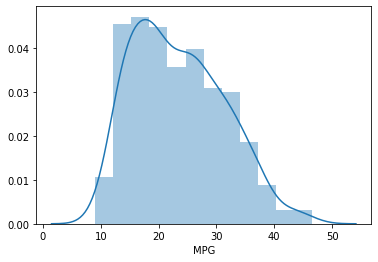

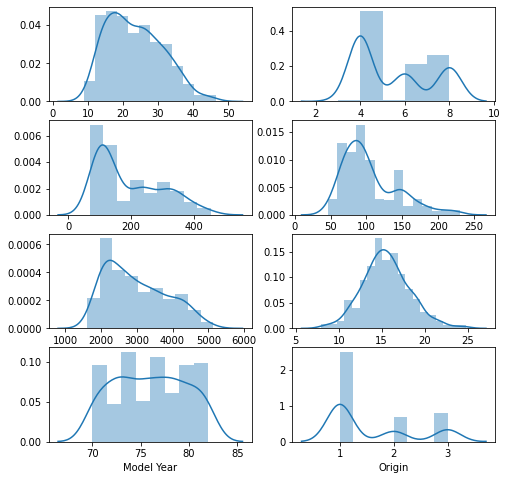

In [8]:
sns.distplot(dataset['MPG'])

f, axes = plt.subplots(4, 2, figsize=(8, 8), sharex=False)

headers = np.array([['MPG','Cylinders'],['Displacement','Horsepower'],['Weight', 'Acceleration'],['Model Year', 'Origin']])

for i in range(4):
  for j in range(2):
      sns.distplot(dataset[headers[i][j]], ax=axes[i, j])

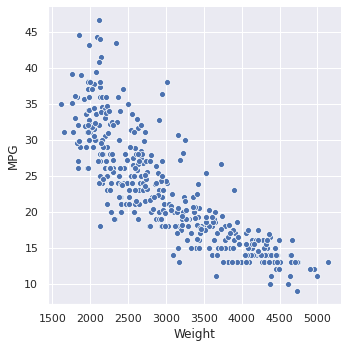

In [9]:
#Visualizing some relations between the data
sns.set()
sns.relplot(x="Weight", y="MPG",
            data=dataset);


As a start, I'd like to see the relation between two common elements that come to mind, i.e. the weight and the miles per gallon of the car. From the above plot, it can be inferred (but not with absolute certainty) that as the weight of the car increases, the mileage efficiency decreases, as expected. We can extend this pairwise plotting to view the relations between other variables in a sort of rudimentary exploration of relations between variables. 

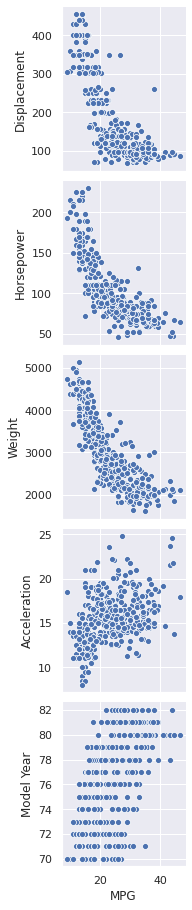

In [10]:
sns.set()
sns.pairplot(dataset, x_vars = ["MPG"], y_vars = ["Displacement","Horsepower","Weight",
                "Acceleration", 'Model Year'])
plt.show()

From the above plots, we can see a generally inverse relationship of MPG with most other variables. For instance, weight, displacement, and horsepower follow a generally decreasing trend as MPG increases. 

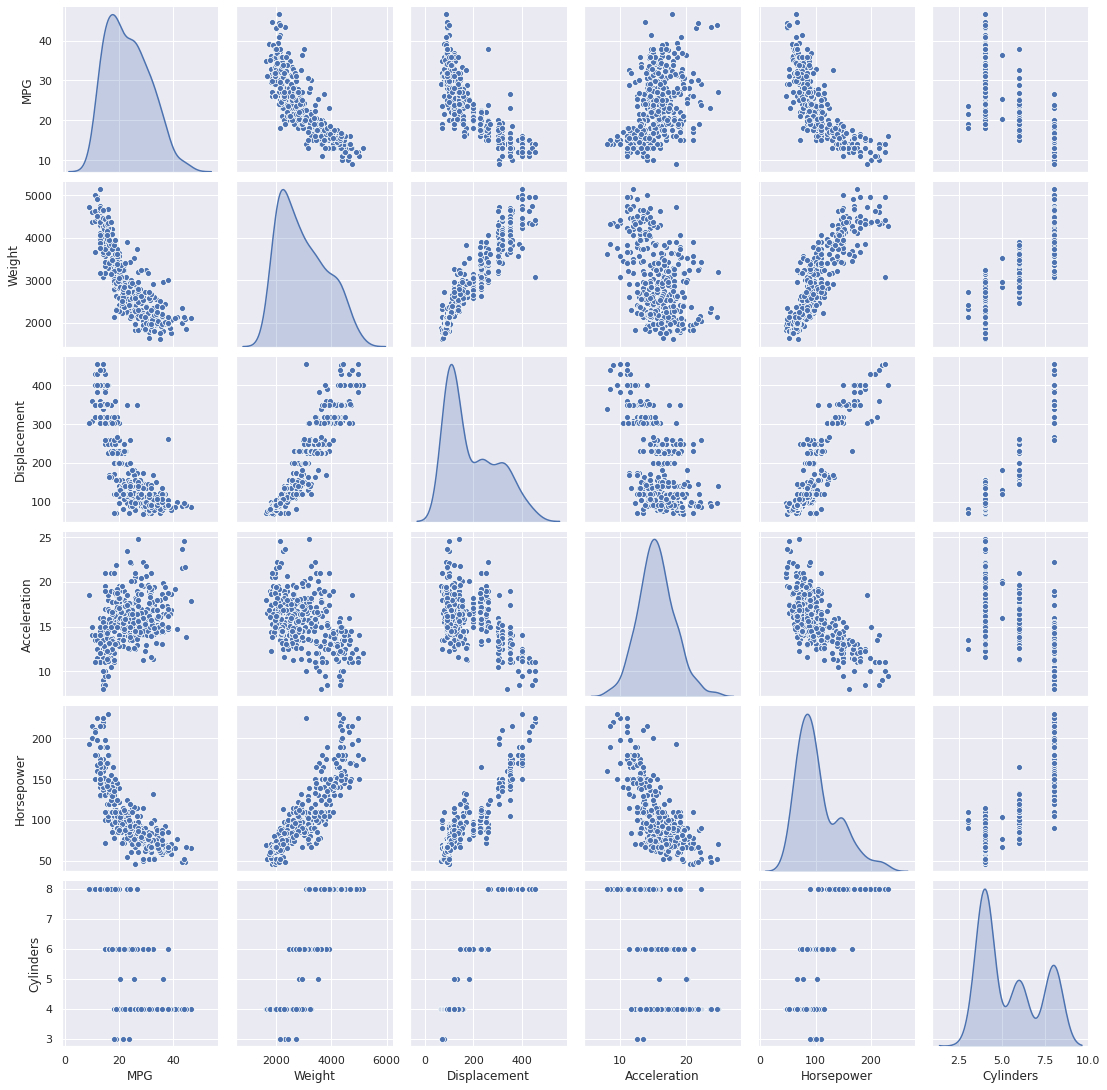

In [11]:
sns.set()
sns.pairplot(dataset[["MPG", "Weight", "Displacement", "Acceleration", "Horsepower", "Cylinders"]], diag_kind="kde")
plt.show()

Overall pairwise plots like the on above can help the viewer to understand relations between different variables at a glance and help to engage in a quick glimpse of the correlations of variables.

In [12]:
#Scaling the data for easier comparison
def scale(data):
    op = (data-data.min())/(data.max()-data.min())
    return op
#scaling the continuous data
scale_data = dataset
scale_data ['Displacement'] = scale(scale_data['Displacement'])
scale_data['Horsepower'] = scale(scale_data['Horsepower'])
scale_data['Acceleration'] = scale(scale_data['Acceleration'])
scale_data['Weight'] = scale(scale_data['Weight'])
scale_data['MPG'] = scale(scale_data['MPG'])

print("Scaled Data:")
scale_data.tail()

Scaled Data:


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,0.478723,4,0.186047,0.217391,0.333711,0.452381,82,1
394,0.930851,4,0.074935,0.032609,0.146583,0.988095,82,2
395,0.611702,4,0.173127,0.206522,0.193365,0.214286,82,1
396,0.505319,4,0.134367,0.179348,0.286929,0.630952,82,1
397,0.585106,4,0.131783,0.195652,0.313864,0.678571,82,1


In [13]:
#Converting categorical Origin data to one-hot representation
dataset['Origin'] = dataset.Origin.replace([1,2,3],['USA','Europe','Japan'])
scale_data['Origin'] = scale_data.Origin.replace([1,2,3],['USA','Europe','Japan'])

In [14]:
dataset[200:300].head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
202,0.226064,6,0.490956,0.266304,0.447973,0.583333,76,USA
203,0.545213,4,0.074935,0.135870,0.060108,0.250000,76,Europe
204,0.611702,4,0.043928,0.130435,0.106890,0.535714,76,Japan
205,0.505319,4,0.074935,0.157609,0.153672,0.500000,76,Japan
206,0.465426,4,0.186047,0.141304,0.269918,0.333333,76,USA


#Further Exploration of MPG with other variables

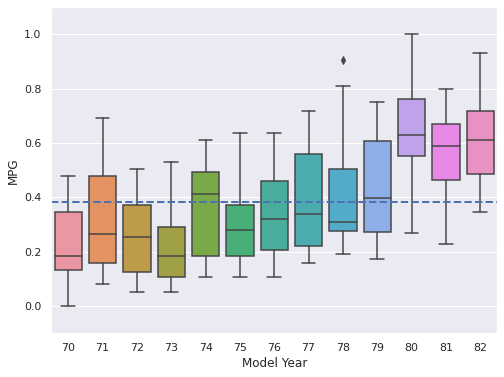

In [15]:
#MPG with Model Year
#Boxplots can show the spread of data around a median as well as give an idea of outliers
def boxplt(var):
  data_plt = pd.concat([scale_data['MPG'], scale_data[var]], axis=1)
  f, ax = plt.subplots(figsize=(8, 6))
  fig = sns.boxplot(x=var, y="MPG", data=data_plt)
  fig.axis(ymin=-0.1, ymax=1.1)
  plt.axhline(scale_data.MPG.mean(),color='b',linestyle='dashed',linewidth=2)

boxplt("Model Year")

It can be seen that as the years progress, the subsequent car models produce higher mileage efficiency, with the median values for a year crossing the average MPG after 1979. The dispersion of data (by observing the interquartile range) also decreases with the years.

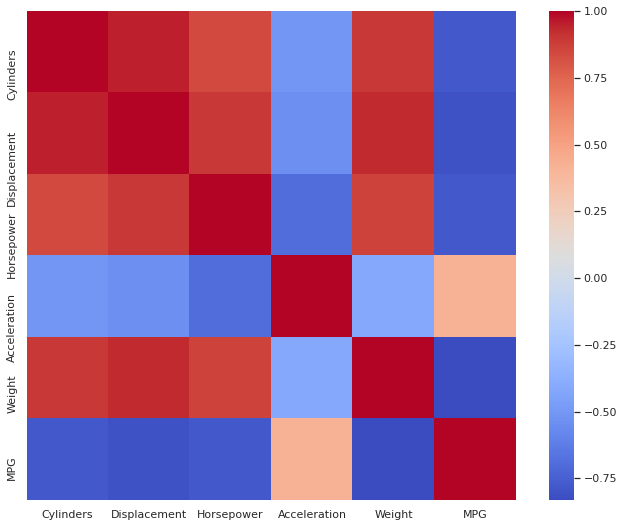

In [16]:
#Correlation Matrix Heatmap

factors = ['Cylinders','Displacement','Horsepower','Acceleration','Weight','MPG']
corrmat = dataset[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, cmap='coolwarm');

We can see that the weight, horsepower, displacement and cylinder elements are highly correlated with each other, This also makes some intuitive sense as these factors are typically inter-related in describing the mechanical aspects of a car's engine.  

#Builidng a Regression Model

The goal of building this model is to see whether we can predict a given variable based on another variable and this would be dependent on the relationships of the variables with each other e.g. based on correlations. This process can also help us to understand causal relationships between variables (e.g. does increasing weight lead to lower miles per gallon?)



In [17]:
#Original dataset
dataset_or = dataset_or.dropna()

#Converting to one-hot representation
dataset_or["Origin"] = dataset_or["Origin"].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset_or = pd.get_dummies(dataset_or, prefix='', prefix_sep='')
dataset_or.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [23]:
train_dataset = dataset_or.sample(frac=0.8,random_state=0)
test_dataset = dataset_or.drop(train_dataset.index)

train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
norm_train_data = norm(train_dataset)
norm_test_data = norm(test_dataset)

In [28]:
print(len(train_dataset.keys())) #9 columns from Cylinders to USA

9


In [27]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    opt = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=opt,
                metrics=['mae', 'mse']) #Mean absolute error and mean squared error
    return model


In [29]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training
epoch = 1000
history = model.fit(
  norm_train_data, train_labels,
  epochs=epoch, validation_split = 0.2, verbose=2, callbacks=[tfdocs.modeling.EpochDots()])

Text(0, 0.5, 'MAE [MPG]')

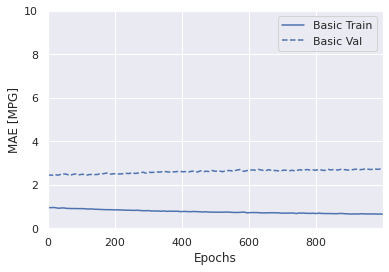

In [39]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

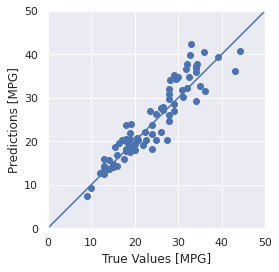

In [40]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


#Further Analysis

We can employ machine learning techniques that analyze multiple variables together e.g. clustering techniques or some application of Principal Component Analysis to see the effects of different variables with respect to each other. This would help us to gather further insights based on how the data behaves. 